In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn 
import duckdb


In [2]:
students_df = pd.read_excel("students.xlsx",sheet_name="StudentOverallData")
students_df.head()

,Roll Number,Name,Marks
0,1,ABC,57
1,2,DEF,88
2,3,GHI,76
3,4,JKL,93
4,5,MNO,64


In [3]:
con1 = duckdb.connect(database=':memory:', read_only=False)
con1.register("students_db",students_df)
print(con1.execute("SELECT * FROM students_db").fetchall())

[(1, 'ABC', 57), (2, 'DEF', 88), (3, 'GHI', 76), (4, 'JKL', 93), (5, 'MNO', 64), (6, 'PQR', 78), (7, 'STU', 95), (8, 'VWX', 74), (9, 'YZA', 91), (10, 'BCD', 75)]


In [4]:
print(students_df)

   Roll Number Name  Marks
0            1  ABC     57
1            2  DEF     88
2            3  GHI     76
3            4  JKL     93
4            5  MNO     64
5            6  PQR     78
6            7  STU     95
7            8  VWX     74
8            9  YZA     91
9           10  BCD     75


In [5]:
print(students_df["Name"])

0    ABC
1    DEF
2    GHI
3    JKL
4    MNO
5    PQR
6    STU
7    VWX
8    YZA
9    BCD
Name: Name, dtype: object


In [6]:
print(con1.execute("SELECT Name FROM students_db").fetchdf())

  Name
0  ABC
1  DEF
2  GHI
3  JKL
4  MNO
5  PQR
6  STU
7  VWX
8  YZA
9  BCD


In [7]:
print(students_df[students_df["Marks"]>90])

   Roll Number Name  Marks
3            4  JKL     93
6            7  STU     95
8            9  YZA     91


In [8]:
print(students_df[(students_df["Marks"]>90)|(students_df["Marks"]<60)]["Marks"])

0    57
3    93
6    95
8    91
Name: Marks, dtype: int64


In [9]:
print(con1.execute("SELECT * FROM students_db WHERE Marks>90").fetchdf())

   Roll Number Name  Marks
0            4  JKL     93
1            7  STU     95
2            9  YZA     91


In [10]:
print(con1.execute("SELECT Marks FROM students_db WHERE Marks<60 OR Marks>90").fetchdf())

   Marks
0     57
1     93
2     95
3     91


In [11]:
teachers_df = pd.read_excel("students.xlsx", sheet_name="StudentTeacher")
teachers_df.head()

,Roll Number,Taught By
0,1,1
1,1,2
2,2,2
3,3,2
4,4,1


In [12]:
teacher_names_dict = {1:"KLM",2:"OPQ"}
def get_teacher_name(teachernum):
    try:
        return teacher_names_dict[teachernum]
    except KeyError:
        return np.NaN
teacher_names = teachers_df["Taught By"].apply(get_teacher_name)
print(teacher_names)

0     KLM
1     OPQ
2     OPQ
3     OPQ
4     KLM
5     OPQ
6     KLM
7     KLM
8     KLM
9     OPQ
10    KLM
11    OPQ
12    OPQ
Name: Taught By, dtype: object


In [13]:
teachers_names_df = teachers_df.join(teacher_names,rsuffix="_name")
print(teachers_names_df)

    Roll Number  Taught By Taught By_name
0             1          1            KLM
1             1          2            OPQ
2             2          2            OPQ
3             3          2            OPQ
4             4          1            KLM
5             5          2            OPQ
6             5          1            KLM
7             6          1            KLM
8             7          1            KLM
9             7          2            OPQ
10            8          1            KLM
11            9          2            OPQ
12           10          2            OPQ


In [14]:
teachers_names_df.rename(columns={"Taught By_name":"Teacher Name"},inplace=True)
print(teachers_names_df)

    Roll Number  Taught By Teacher Name
0             1          1          KLM
1             1          2          OPQ
2             2          2          OPQ
3             3          2          OPQ
4             4          1          KLM
5             5          2          OPQ
6             5          1          KLM
7             6          1          KLM
8             7          1          KLM
9             7          2          OPQ
10            8          1          KLM
11            9          2          OPQ
12           10          2          OPQ


In [15]:
con1.register("teachers_names_db",teachers_names_df)
print(con1.execute("SELECT * FROM teachers_names_db ").fetchdf())

    Roll Number  Taught By Teacher Name
0             1          1          KLM
1             1          2          OPQ
2             2          2          OPQ
3             3          2          OPQ
4             4          1          KLM
5             5          2          OPQ
6             5          1          KLM
7             6          1          KLM
8             7          1          KLM
9             7          2          OPQ
10            8          1          KLM
11            9          2          OPQ
12           10          2          OPQ


In [16]:
#print(con1.execute("SELECT `Teacher Name` FROM teachers_names_db ").fetchdf())
#Will not work due to space in column name

In [17]:
print(teachers_names_df["Teacher Name"])

0     KLM
1     OPQ
2     OPQ
3     OPQ
4     KLM
5     OPQ
6     KLM
7     KLM
8     KLM
9     OPQ
10    KLM
11    OPQ
12    OPQ
Name: Teacher Name, dtype: object


In [18]:
# Creating a DuckDb Without Spaces in column names for SQL ease
con2 = duckdb.connect(database=':memory:', read_only=False)
students_sql = pd.read_excel("students_sql.xlsx",sheet_name="StudentOverallData")
teachers_sql = pd.read_excel("students_sql.xlsx", sheet_name="StudentTeacher")
sectionwise_sql = pd.read_excel("students_sql.xlsx", sheet_name="StudentSectionWiseMarks")
con2.register("students_db",students_sql)
con2.register("teachers_db",teachers_sql)
con2.register("sectionwise_marks_db",sectionwise_sql)
#Loading the Third Tab for Pandas Analysis
sectionwise_df = pd.read_excel("students.xlsx", sheet_name="StudentSectionWiseMarks")

In [19]:
joined_df  = students_df.merge(sectionwise_df,on="Roll Number",how="inner",suffixes=["_total","_sectionwise"])
print(joined_df)

    Roll Number Name  Marks_total  Paper Section  Marks_sectionwise
0             1  ABC           57              1                 27
1             1  ABC           57              2                 30
2             2  DEF           88              1                 44
3             2  DEF           88              2                 44
4             3  GHI           76              1                 26
5             3  GHI           76              2                 50
6             4  JKL           93              1                 44
7             4  JKL           93              2                 49
8             5  MNO           64              1                 30
9             5  MNO           64              2                 34
10            6  PQR           78              1                 39
11            6  PQR           78              2                 39
12            7  STU           95              1                 49
13            7  STU           95              2

In [20]:
joined_sql_df = con2.execute("SELECT * FROM students_db, sectionwise_marks_db WHERE students_db.Roll_Number=sectionwise_marks_db.Roll_Number").fetchdf()
print(joined_sql_df)

    Roll_Number Name  Marks  Roll_Number_2  Paper_Section  Marks_2
0             1  ABC     57              1              1       27
1             1  ABC     57              1              2       30
2             2  DEF     88              2              1       44
3             2  DEF     88              2              2       44
4             3  GHI     76              3              1       26
5             3  GHI     76              3              2       50
6             4  JKL     93              4              1       44
7             4  JKL     93              4              2       49
8             5  MNO     64              5              1       30
9             5  MNO     64              5              2       34
10            6  PQR     78              6              1       39
11            6  PQR     78              6              2       39
12            7  STU     95              7              1       49
13            7  STU     95              7              2     

In [21]:
#joined_sql_df_other_format = con2.execute("SELECT * FROM students_db INNER JOIN sectionwise_marks_db on Roll_Number").fetchdf()
#print(joined_sql_df_other_format) # PostGRES format doesn't work in DuckDB
joined_sql_df_other_format2 = con2.execute("SELECT * FROM students_db INNER JOIN sectionwise_marks_db on students_db.Roll_Number=sectionwise_marks_db.Roll_Number").fetchdf()
print(joined_sql_df_other_format2)

    Roll_Number Name  Marks  Roll_Number_2  Paper_Section  Marks_2
0             1  ABC     57              1              1       27
1             1  ABC     57              1              2       30
2             2  DEF     88              2              1       44
3             2  DEF     88              2              2       44
4             3  GHI     76              3              1       26
5             3  GHI     76              3              2       50
6             4  JKL     93              4              1       44
7             4  JKL     93              4              2       49
8             5  MNO     64              5              1       30
9             5  MNO     64              5              2       34
10            6  PQR     78              6              1       39
11            6  PQR     78              6              2       39
12            7  STU     95              7              1       49
13            7  STU     95              7              2     

In [22]:
ps2_df = joined_sql_df[joined_sql_df["Paper_Section"]==2]
def check_for_less_than_50p(marks,s2marks):
    return s2marks < 0.5*marks
flagged = ps2_df[["Marks","Marks_2"]].apply(lambda x: check_for_less_than_50p(x["Marks"],x["Marks_2"]),axis=1)
print(ps2_df[flagged]["Roll_Number"])

13    7
15    8
17    9
Name: Roll_Number, dtype: int64


In [23]:
print(len(students_df["Marks"]))
print(students_df["Marks"].mean())
print(students_df["Marks"].median())
print(students_df["Marks"].max())
print(students_df["Marks"].min())
print(students_df["Marks"].std())

10
79.1
77.0
95
57
12.635487942915207


In [24]:
print(con2.execute("SELECT COUNT(Marks) FROM students_db").fetchall())
print(con2.execute("SELECT AVG(Marks) FROM students_db").fetchall())
print(con2.execute("SELECT MAX(Marks) FROM students_db").fetchall())
print(con2.execute("SELECT MIN(Marks) FROM students_db").fetchall())

[(10,)]
[(79.1,)]
[(95,)]
[(57,)]


In [25]:
swgb = sectionwise_df.groupby("Paper Section")
for (paper_section,sectiondf) in swgb:
    print("Paper Section: ","\n",paper_section,"\n","Data: ","\n",sectiondf)

Paper Section:  
 1 
 Data:  
     Roll Number  Paper Section  Marks
0             1              1     27
2             2              1     44
4             3              1     26
6             4              1     44
8             5              1     30
10            6              1     39
12            7              1     49
14            8              1     38
16            9              1     46
18           10              1     37
Paper Section:  
 2 
 Data:  
     Roll Number  Paper Section  Marks
1             1              2     30
3             2              2     44
5             3              2     50
7             4              2     49
9             5              2     34
11            6              2     39
13            7              2     46
15            8              2     36
17            9              2     45
19           10              2     38


In [26]:
for (paper_section,sectiondf) in swgb:
    print("Paper Section: ",paper_section,"Paper Section Average Marks: ",sectiondf["Marks"].mean())

Paper Section:  1 Paper Section Average Marks:  38.0
Paper Section:  2 Paper Section Average Marks:  41.1


In [27]:
sectionwiseavgmarksdf = con2.execute("SELECT AVG(Marks) FROM sectionwise_marks_db GROUP BY Paper_Section").fetchdf()
print(sectionwiseavgmarksdf)

   avg(marks)
0        38.0
1        41.1


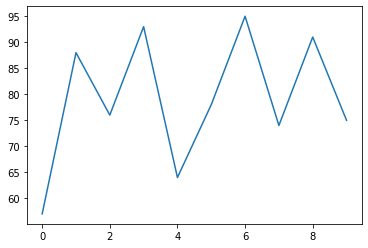

In [28]:
plt.plot(students_df["Marks"])
plt.show()

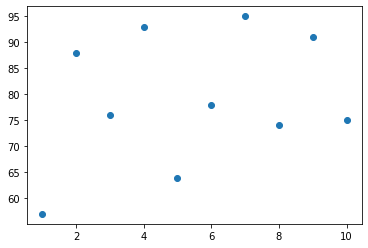

In [29]:
plt.scatter(x=students_df["Roll Number"],y=students_df["Marks"])
plt.show()

C:\mywares\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


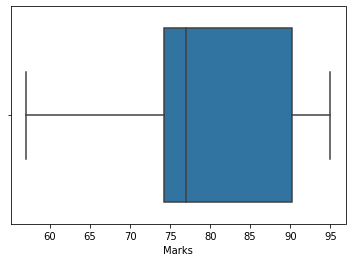

In [30]:
seaborn.boxplot(students_df["Marks"])
plt.show()

In [31]:
teachers_marks_df = students_df.merge(teachers_names_df, on= "Roll Number")
print(teachers_marks_df)

    Roll Number Name  Marks  Taught By Teacher Name
0             1  ABC     57          1          KLM
1             1  ABC     57          2          OPQ
2             2  DEF     88          2          OPQ
3             3  GHI     76          2          OPQ
4             4  JKL     93          1          KLM
5             5  MNO     64          2          OPQ
6             5  MNO     64          1          KLM
7             6  PQR     78          1          KLM
8             7  STU     95          1          KLM
9             7  STU     95          2          OPQ
10            8  VWX     74          1          KLM
11            9  YZA     91          2          OPQ
12           10  BCD     75          2          OPQ


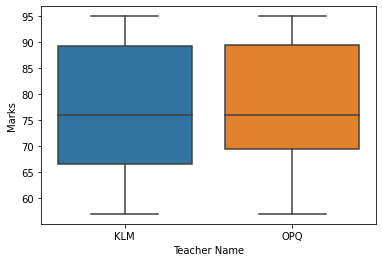

In [32]:
seaborn.boxplot(x=teachers_marks_df["Teacher Name"],y=teachers_marks_df["Marks"])
plt.show()

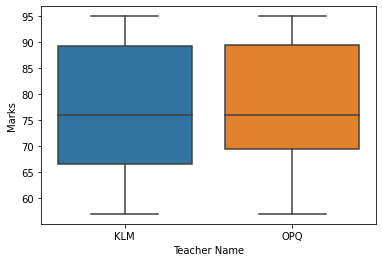

In [33]:
seaborn.boxplot(data=teachers_marks_df,x="Teacher Name",y="Marks")
plt.show()